In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
df = pd.read_csv('Age _Fossil.csv')

In [58]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [59]:
df.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.486938,0.430116,0.532054,152.832801,0.938315,70.702460,326.655177,40586.656435
std,0.257132,0.233536,0.287929,86.272234,0.521643,37.352584,187.032333,15200.700905
min,0.000241,0.000244,0.000076,0.130000,0.000275,0.130000,0.620000,4208.000000
25%,0.294091,0.246269,0.316775,85.390000,0.533519,42.487500,181.047500,29766.250000
50%,0.473715,0.416046,0.511830,146.000000,0.905684,68.785000,308.260000,39567.000000
75%,0.658012,0.590752,0.723805,211.932500,1.289307,96.440000,455.520000,50550.500000
max,1.533270,1.000000,1.513325,494.200000,3.071434,216.390000,1010.090000,103079.000000


In [60]:
df['inclusion_of_other_fossils'].unique()

array([False,  True])

In [61]:
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

df_categorical = df.select_dtypes(include=['object'])
imputer = SimpleImputer(strategy='most_frequent')
df[df_categorical.columns] = imputer.fit_transform(df_categorical)

In [62]:
numeric_cols = df.drop('age', axis=1).select_dtypes(include=['int64', 'float64']).columns
categ_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

numeric_cols, categ_cols

(Index(['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
        'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size',
        'fossil_weight'],
       dtype='object'),
 Index(['geological_period', 'paleomagnetic_data', 'inclusion_of_other_fossils',
        'surrounding_rock_type', 'stratigraphic_position'],
       dtype='object'))

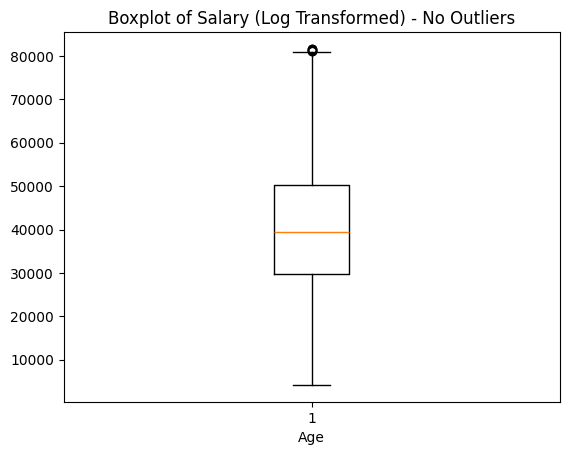

In [63]:
# Calculate Q1, Q3, IQR, and bounds
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outlier = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Create boxplot without outliers
plt.boxplot(df_no_outlier['age'])
plt.xlabel('Age')
plt.title('Boxplot of Salary (Log Transformed) - No Outliers')
plt.show()

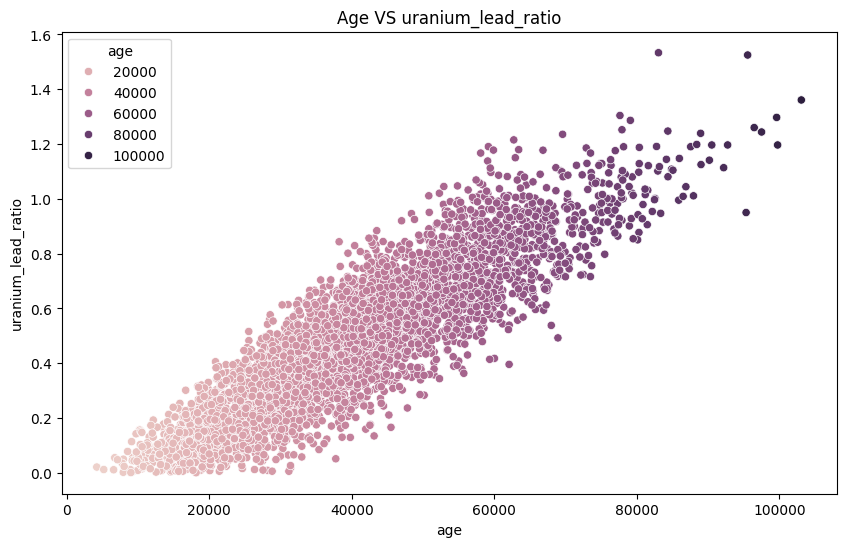

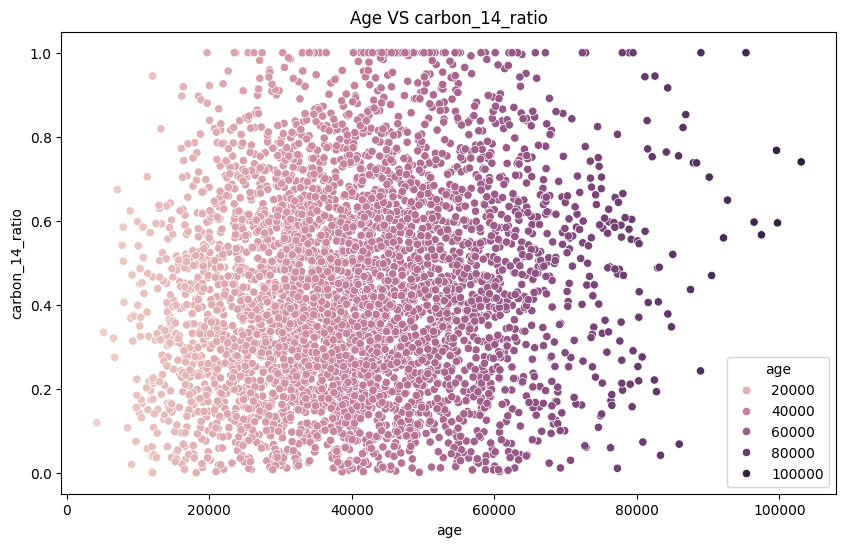

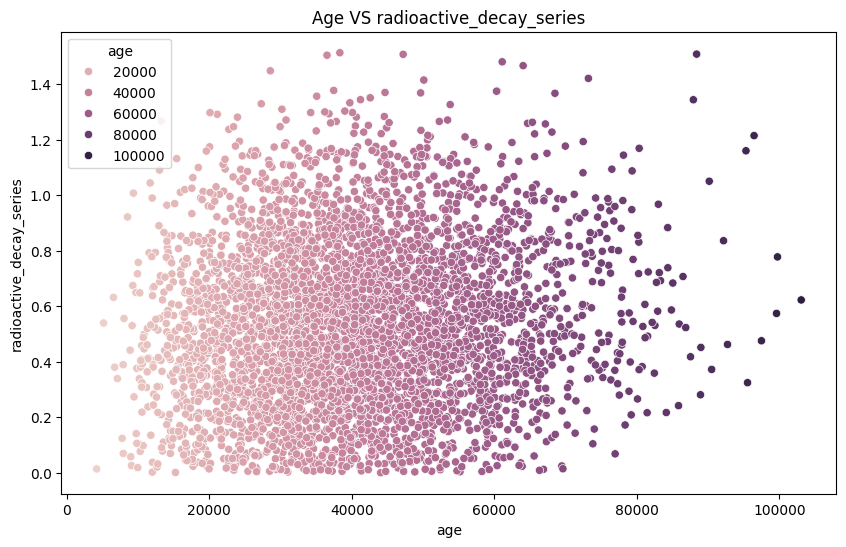

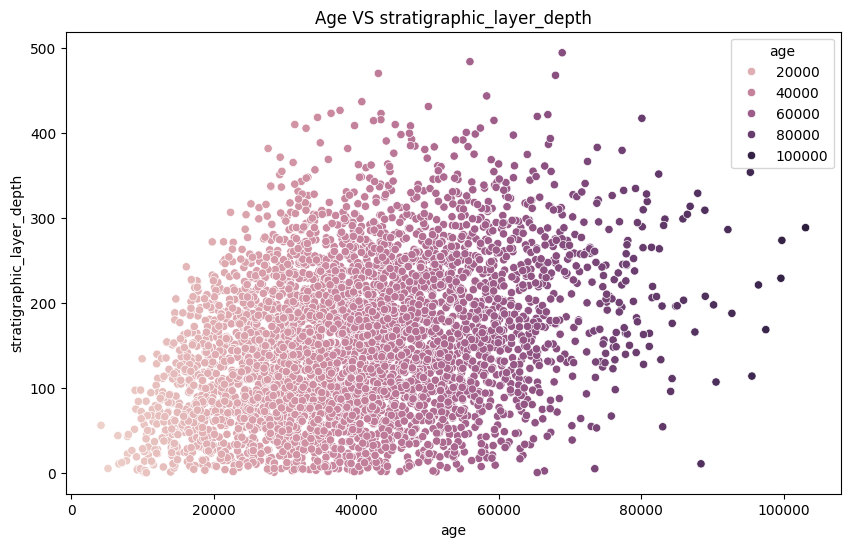

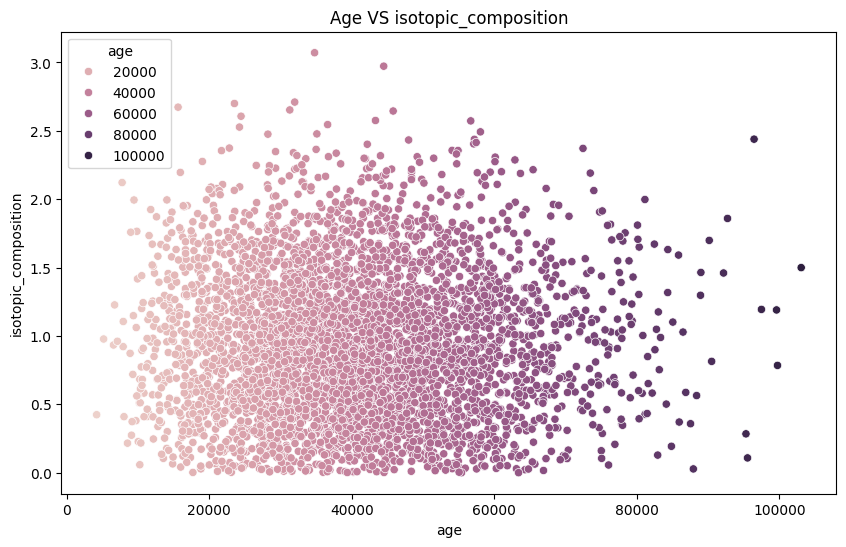

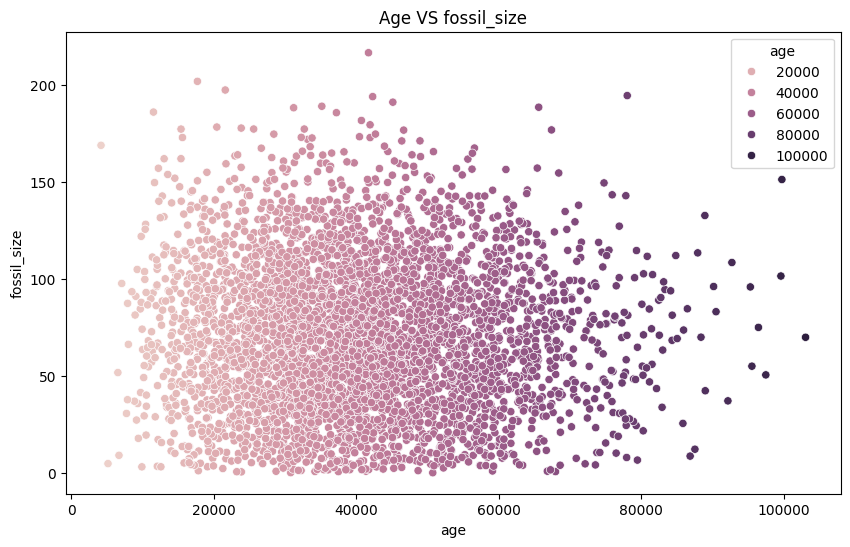

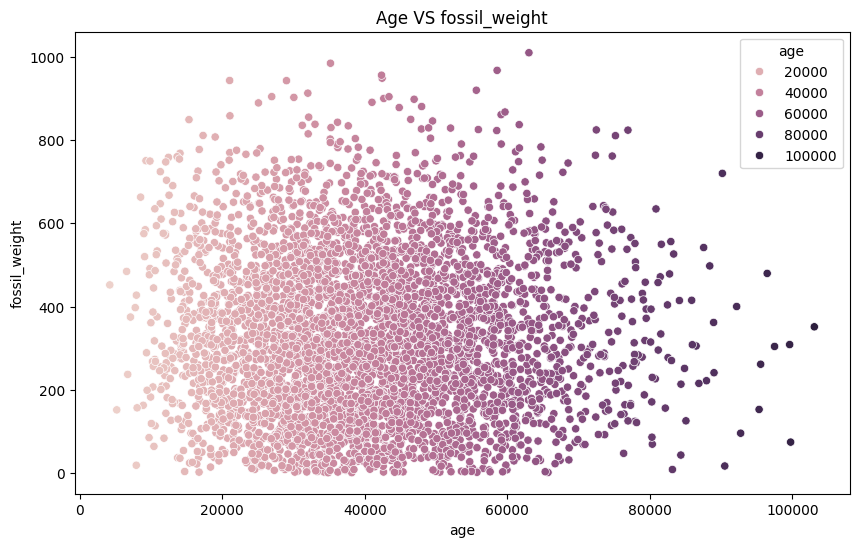

In [64]:
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    plt.title(f'Age VS {col}')
    sns.scatterplot(data=df, x='age', y=col, hue='age')
    plt.show()

In [65]:
# Encoding categorical variables
label_encoders_age = {}
for column in df_categorical.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders_age[column] = le


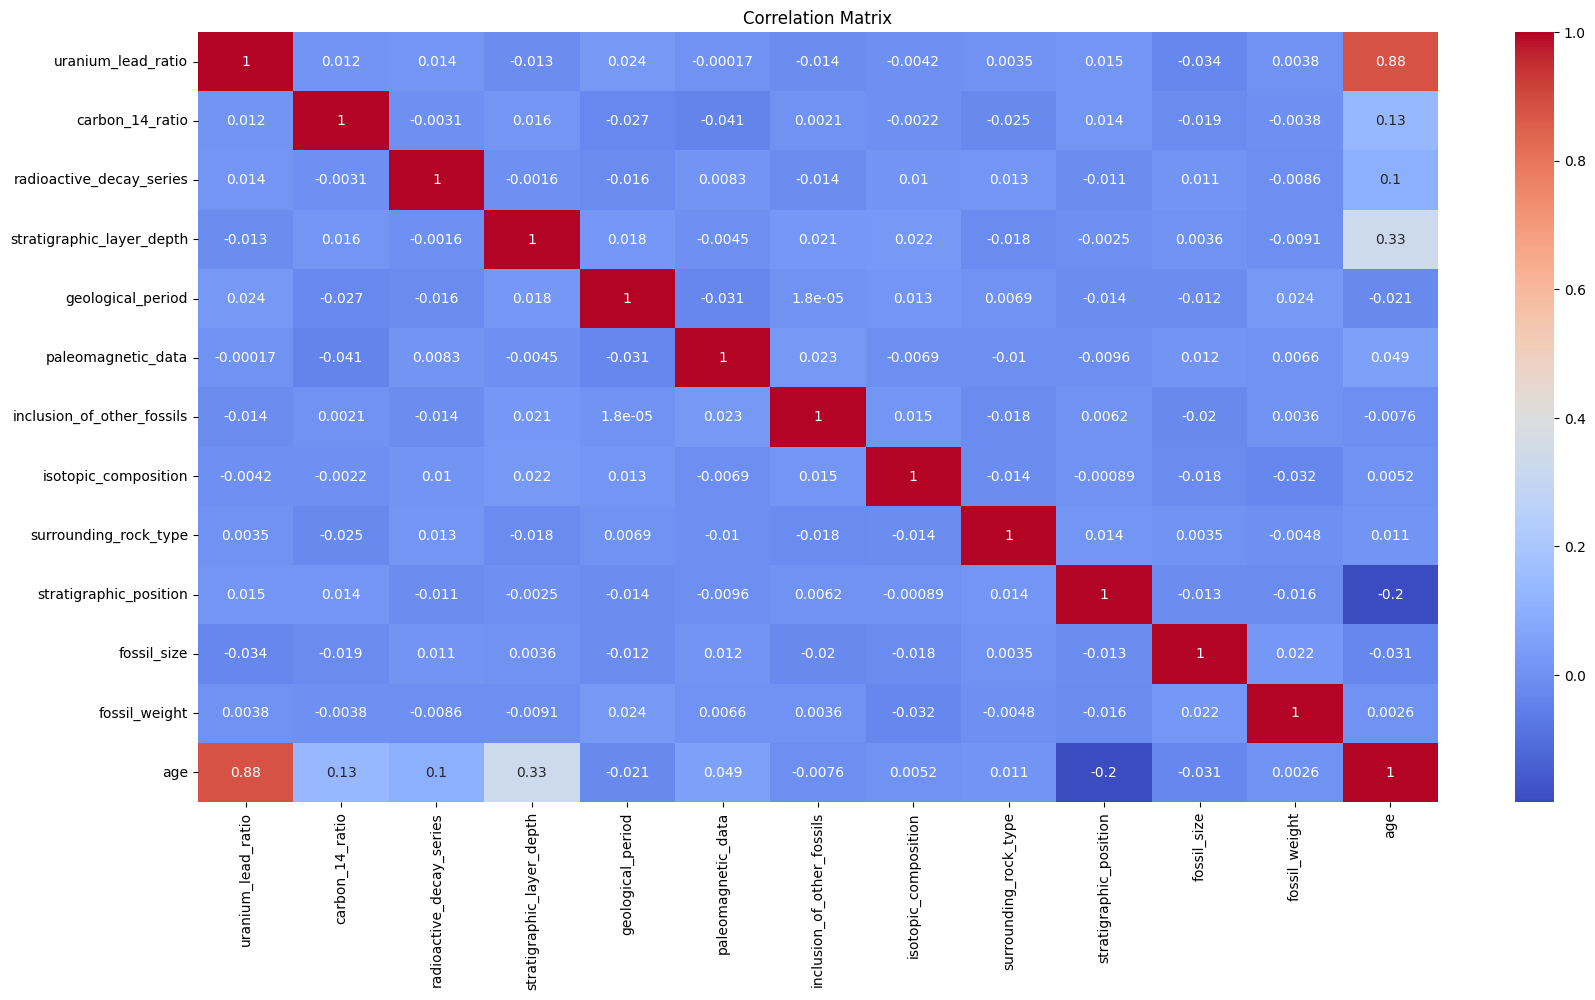

In [66]:
correlation_matrix=df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [67]:
X = df.drop('age', axis=1)  
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\asus\AppData\Local\Temp\ipykernel_48320\3356931198.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dataset')


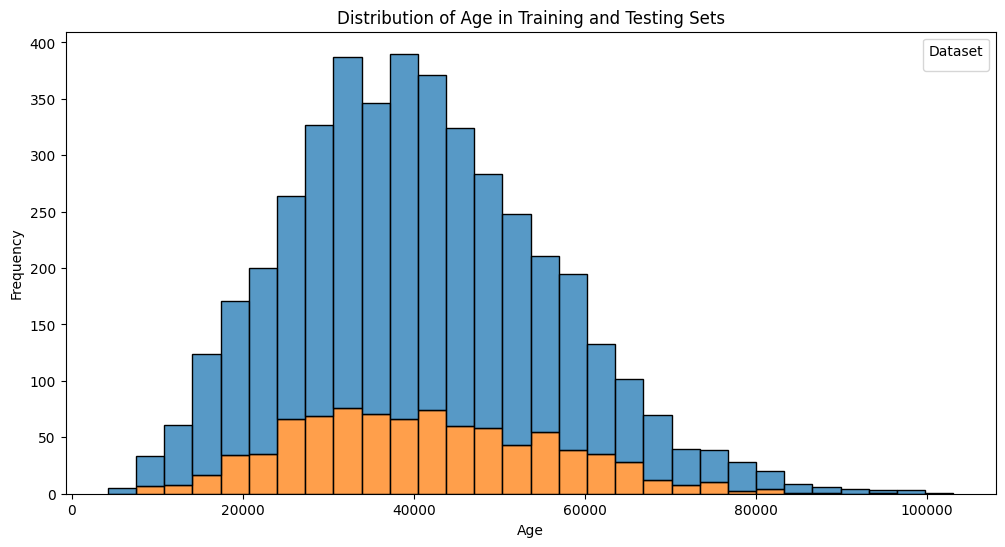

In [68]:
# Menggabungkan data untuk visualisasi
train_data = pd.DataFrame({'age': y_train, 'dataset': 'Train'})
test_data = pd.DataFrame({'age': y_test, 'dataset': 'Test'})
combined_data = pd.concat([train_data, test_data])

# Visualisasi distribusi 'age' untuk Train dan Test
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='age', hue='dataset', multiple='stack', bins=30, palette='tab10')

plt.title('Distribution of Age in Training and Testing Sets')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.show()

In [69]:
# Membuat pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        
    ('regressor', LinearRegression())    
])

In [70]:
# Melatih model dengan pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [71]:
# Melakukan prediksi pada set pengujian
y_pred = pipeline.predict(X_test)


In [72]:
# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 6573225.54
R^2 Score: 0.97


In [73]:
import pickle

# Simpan model ke file pickle
with open('Age_Fossil.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

# Simpan label encoders ke file pickle
with open('label_encoders_age.pkl', 'wb') as le_file:
    pickle.dump(label_encoders_age, le_file)